# Data Visualisation

## Preprocessing

In [10]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.manifold import TSNE
import warnings

save_fig = False # Save figures or not

warnings.filterwarnings('ignore')
u = np.load("./part1/UM/Setting_5_U_1.npy")
m = np.load("./part1/UM/Setting_5_M_1.npy")
m = np.transpose(m)
print(f"Before preprocessing: The shape of M: {m.shape}.")

users = pd.read_table("./part1/ml-1m/users.dat", 
                      sep="::", 
                      names=["UserID", "Gender", "Age", "Occupation", "Zip-code"], 
                      engine="python")
movies = pd.read_table("./part1/ml-1m/movies.dat", 
                       sep="::", 
                       names=["MovieID", "Title", "Genres"], 
                       engine="python", 
                       encoding="ISO-8859-1")

# Users
occupation = users["Occupation"].to_numpy()
age = users["Age"].to_numpy()
gender = users["Gender"].to_list()
gender = [g == "F" for g in gender]

# Remove movies that are in M but not in movies.dat
not_in_movies = list(set(range(3952)) - set(movies["MovieID"].apply(lambda x: x-1)))
m = np.delete(m, not_in_movies, axis=0)
print(f"After preprocessing: The shape of M: {m.shape}.")

# Movies
categories = ["Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", 
              "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", 
              "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
categories_dict = dict((j,i) for i,j in enumerate(categories))
genres_series = movies["Genres"].str.split("|")
m_lst = list()
genres = list()

for row in range(m.shape[0]):
    item = genres_series[row]
    for index in range(len(item)):
        m_lst.append(m[row, :])
        genres.append(categories_dict[item[index]])
        
m_ = np.array(m_lst)
genres = np.array(genres)
year = movies["Title"].apply(lambda x: int(x[-5:-1]))

Before preprocessing: The shape of M: (3952, 10).
After preprocessing: The shape of M: (3883, 10).


In [2]:
# Define visualization functions
def pca_fun(data, n_components, c_lst, label, boundaries, ticks, save=False, save_path=""):
    pca_model = PCA(n_components=n_components)
    pca = pca_model.fit_transform(data)
    plt.scatter(pca[:,0], pca[:,1], c=c_lst, alpha=0.5, cmap='Spectral',s=5)
    plt.colorbar(boundaries=boundaries, label=label).set_ticks(ticks)
    if save:
        plt.savefig(save_path)
    plt.show()

def umap_fun(data, n_components, n_neighbors, c_lst, label, boundaries, ticks, save=False, save_path=""):
    umap_model = UMAP(n_neighbors=n_neighbors, n_components=n_components)
    umap = umap_model.fit_transform(data)
    plt.scatter(umap[:,0], umap[:,-1], c=c_lst, alpha=0.5, cmap='Spectral',s=5)
    plt.colorbar(boundaries=boundaries, label=label).set_ticks(ticks)
    if save:
        plt.savefig(save_path)
    plt.show()
    
def tsne_fun(data, n_components, c_lst, label, boundaries, ticks, save=False, save_path=""):
    tsne_model = TSNE(n_components=n_components)
    tsne = tsne_model.fit_transform(data)
    plt.scatter(tsne[:,0], tsne[:,-1], c=c_lst, alpha=0.5, cmap='Spectral', s=5)
    plt.colorbar(boundaries=boundaries, label=label).set_ticks(ticks)
    if save:
        plt.savefig(save_path)
    plt.show()

## Users

### PCA

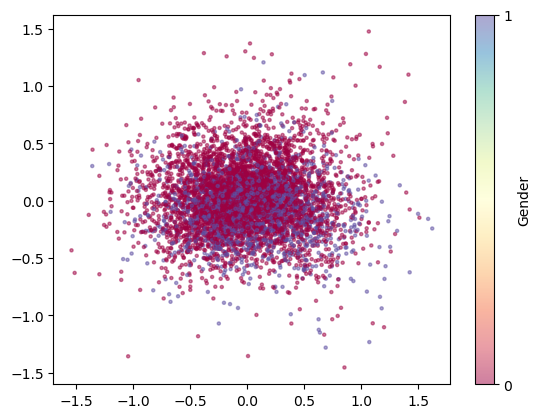

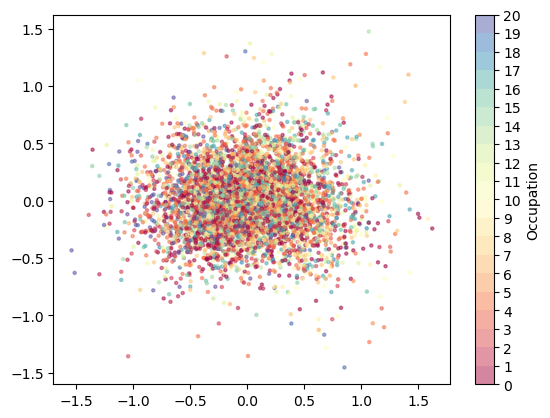

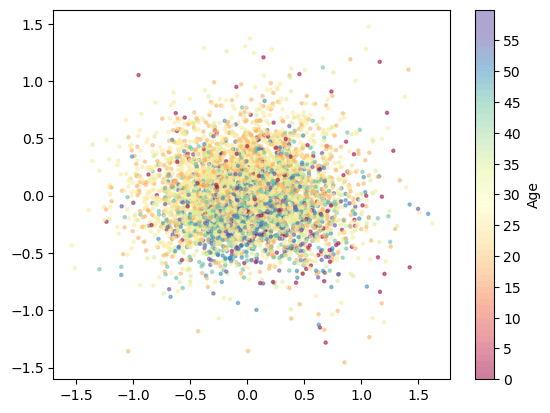

In [3]:
pca_fun(u, 2, gender, "Gender", None, [0,1], save=save_fig, save_path="./fig/pca_gender.png")
pca_fun(u, 2, occupation, "Occupation", np.arange(21), np.arange(21), save=save_fig, save_path="./fig/pca_occ.png")
pca_fun(u, 2, age, "Age", np.arange(61), np.arange(0,60,5), save=save_fig, save_path="./fig/pca_age.png")

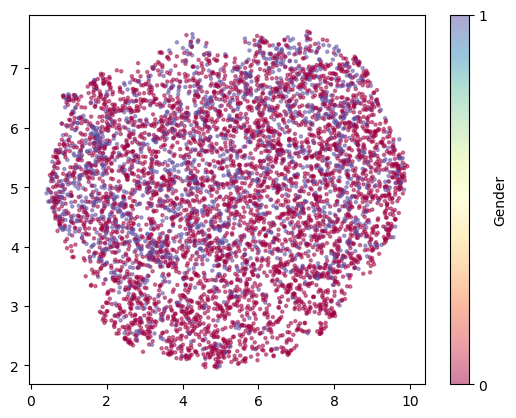

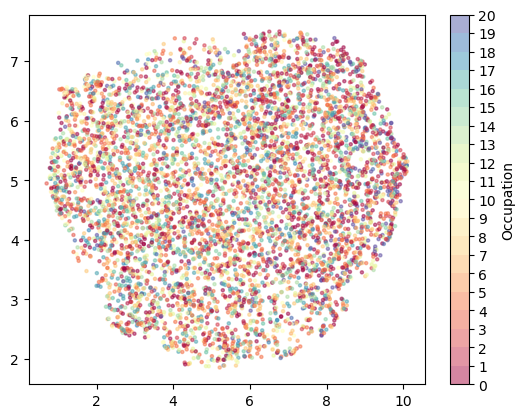

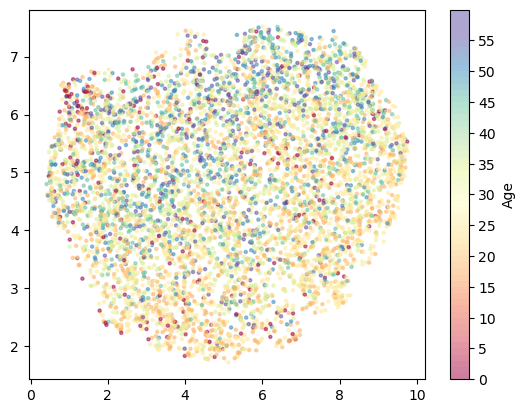

In [4]:
umap_fun(u, 2, 10, gender, "Gender", None, [0,1], save=save_fig, save_path="./fig/umap_gender.png")
umap_fun(u, 2, 10, occupation, "Occupation", np.arange(21), np.arange(21), save=save_fig, save_path="./fig/umap_occ.png")
umap_fun(u, 2, 10, age, "Age", np.arange(61), np.arange(0,60,5), save=save_fig, save_path="./fig/umap_age.png")

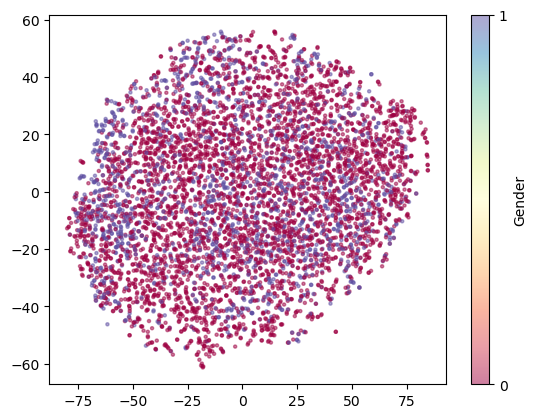

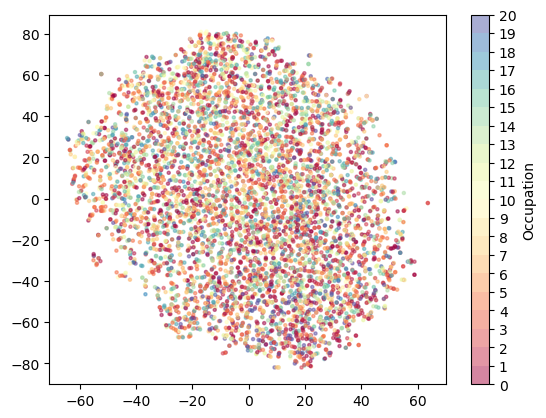

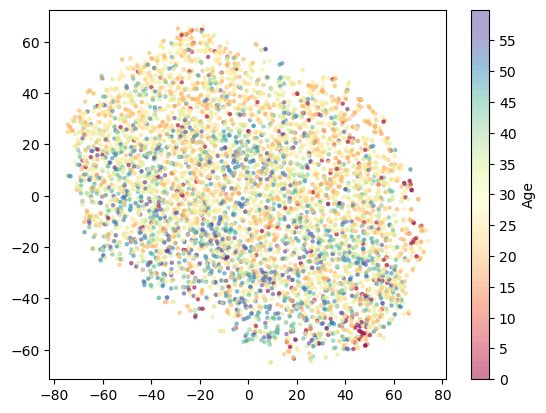

In [9]:
tsne_fun(u, 2, gender, "Gender", None, [0,1], save=save_fig, save_path="./fig/tsne_gender.png")
tsne_fun(u, 2, occupation, "Occupation", np.arange(21), np.arange(21), save=save_fig, save_path="./fig/tsne_occ.png")
tsne_fun(u, 2, age, "Age", np.arange(61), np.arange(0,60,5), save=save_fig, save_path="./fig/tsne_age.png")

## Movies

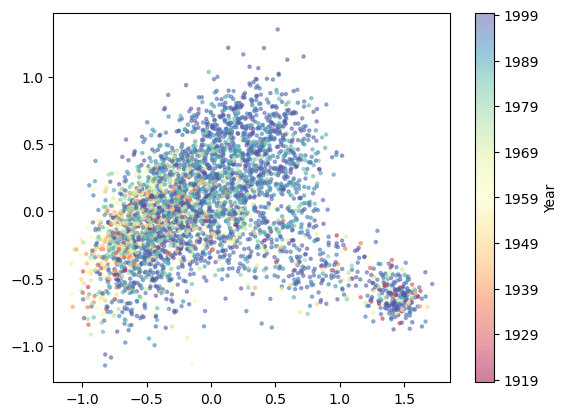

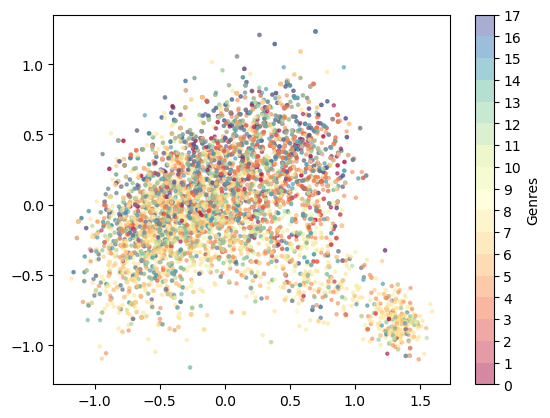

In [6]:
pca_fun(m, 2, year, "Year", np.arange(1919, 2001)-0.5, np.arange(1919,2000,10), save=save_fig, save_path="./fig/pca_year.png")
pca_fun(m_, 2, genres, "Genres", np.arange(18), np.arange(18), save=save_fig, save_path="./fig/pca_genres.png")

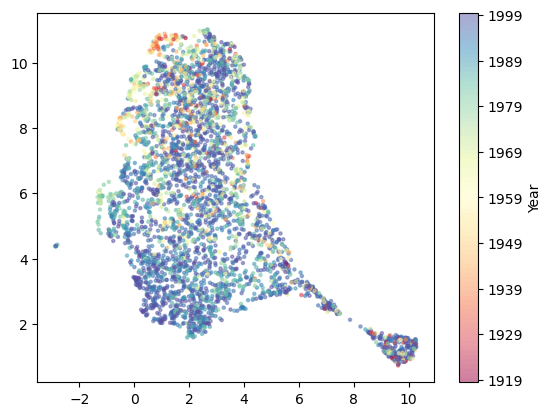

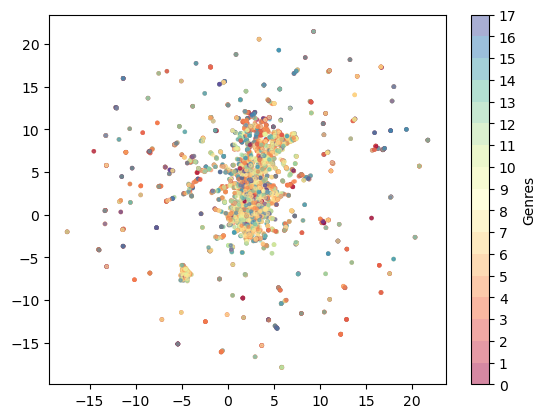

In [7]:
umap_fun(m, 2, 8, year, "Year", np.arange(1919, 2001)-0.5, np.arange(1919,2000,10), save=save_fig, save_path="./fig/umap_year.png")
umap_fun(m_, 2, 8, genres, "Genres", np.arange(18), np.arange(18), save=save_fig, save_path="./fig/umap_genres.png")

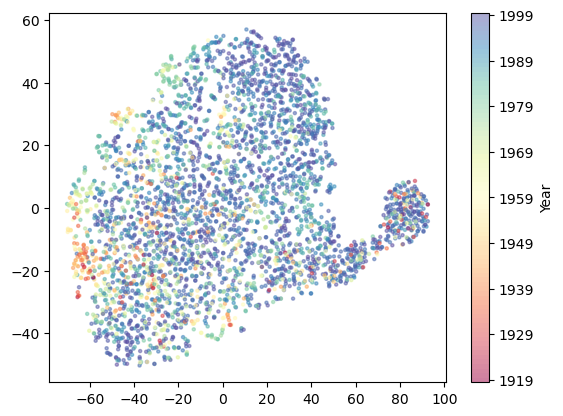

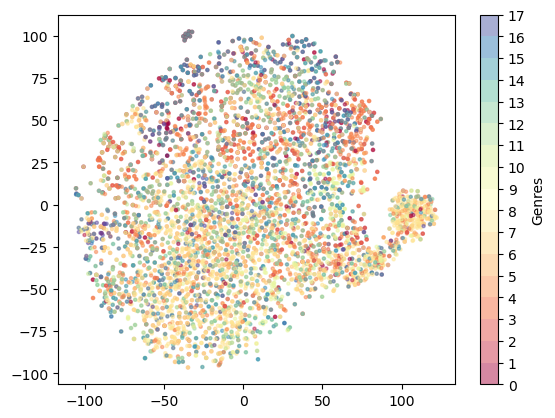

In [8]:
tsne_fun(m, 2, year, "Year", np.arange(1919, 2001)-0.5, np.arange(1919,2000,10), save=save_fig, save_path="./fig/tsne_year.png")
tsne_fun(m_, 2, genres, "Genres", np.arange(18), np.arange(18), save=save_fig, save_path="./fig/tsne_genres.png")